## Analisis de sentimientos

### Seleccione un corpus a trabajar
* Puede ser el corpus utilizado en los ejercicios anteriores.
* Un dataset de tweets podría ser un buen ejemplo.
* Dataset minado de alguna red social como todos los comentarios de un post de una figura pública.

In [32]:
import pandas as pd
import random
import matplotlib.pyplot as plt

from transformers import pipeline

In [33]:
df = pd.read_csv('tweetsDatasets.csv')
df.head()

,How unhappy some dogs like it though,talking to my over driver about where I'm goinghe said he'd love to go to New York too but since Trump it's probably not,Does anybody know if the Rand's likely to fall against the dollar? I got some money I need to change into R but it keeps getting stronger unhappy,I miss going to gigs in Liverpool unhappy,There isnt a new Riverdale tonight ? unhappy,it's that A*dy guy from pop Asia and then the translator so they'll probs go with them around Aus unhappy,Who's that chair you're sitting in? Is this how I find out. Everyone knows now. You've shamed me in pu,don't like how jittery caffeine makes me sad,My area's not on the list unhappy think I'll go LibDems anyway,I want fun plans this weekend unhappy,...,$ES_F $SPY Bulls are just relentless happy Some setups I like today,Thanks for the recent follow Happy to connect happy have a great Thursday..33,Thanks for the recent follow Happy to connect happy have a great Thursday. Want this.5,Thanks for the recent follow Happy to connect happy have a great Thursday. Want this.7,you know that the problem still exist :D,Thanks for the recent follow Happy to connect happy have a great Thursday. Get this.1,- top engaged members this week happy,ngam to weeks left for cadet pilot exam crying with joy,Great! You're welcome Josh happy ^Adam,Sixth spot not applicable Team! Higher pa! :)KISSES TheFashionIcon.4


### Aplicar el modelo pre entrenado del “sentiment analisis” y analizar reacciones de un post.

In [34]:
sentiment_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

Downloading: 100%|██████████| 1.52k/1.52k [00:00<00:00, 761kB/s]
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [48]:
tweets = df.columns.tolist()
tweets = random.sample(tweets, len(tweets))

In [54]:
results = sentiment_pipeline(tweets)

In [55]:
for i in range(10):
    print(tweets[i])
    print(results[i], '\n')

mane has been amazing unhappy 
{'label': 'NEG', 'score': 0.9520439505577087} 

i want to make waffles unhappy 
{'label': 'NEG', 'score': 0.8557916879653931} 

No food for dissent in this tradition of 
{'label': 'NEU', 'score': 0.776016354560852} 

President backs move to make mandatory up to Class X. 
{'label': 'NEU', 'score': 0.6777465343475342} 

Awesome recommendation Jess! Listened to the
{'label': 'POS', 'score': 0.988669753074646} 

government okays 33% reservation for women in state jobs 
{'label': 'NEU', 'score': 0.8305923938751221} 

I have to wake up at 4:30 tomorrow so my body's gotten a head start by waking up at 4:30 every day this week unhappy 
{'label': 'NEG', 'score': 0.9783318042755127} 

Alright. Looks like back to chores behind the scenes. My page hits drop to 1K daily when I don't visit and post. unhappy 
{'label': 'NEG', 'score': 0.9826012253761292} 

 maybe coffee is not for you unhappy 
{'label': 'NEU', 'score': 0.6468407511711121} 

0 motivation to study unhappy

In [56]:
c = [0,0,0]

for r in results:
    if r['label'] == 'NEG':
        c[0] += 1
    elif r['label'] == 'NEU':
        c[1] += 1
    else:
        c[2] += 1

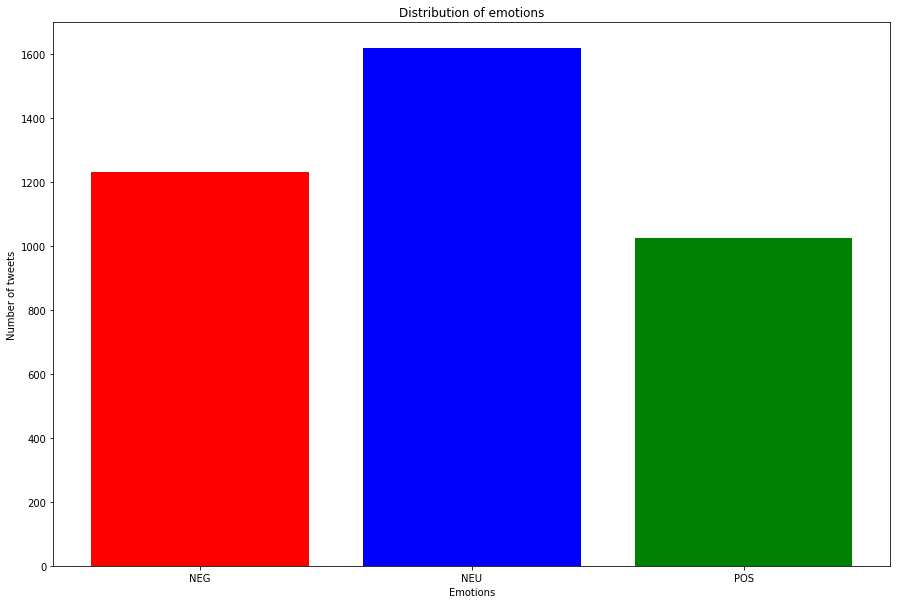

In [57]:
plt.figure(figsize=(15,10))
plt.bar(['NEG','NEU','POS'],c, color=['red','blue','green'])
plt.title('Distribution of emotions')
plt.xlabel('Emotions')
plt.ylabel('Number of tweets')
plt.show()